<a href="https://colab.research.google.com/github/nannthd/BasicProg_DataViz65/blob/main/DataViz65_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน 

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้


1. คะแนนประกอบด้วย 2 ส่วน

* คะแนน 40% จากอาจารย์ที่ปรึกษา  (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

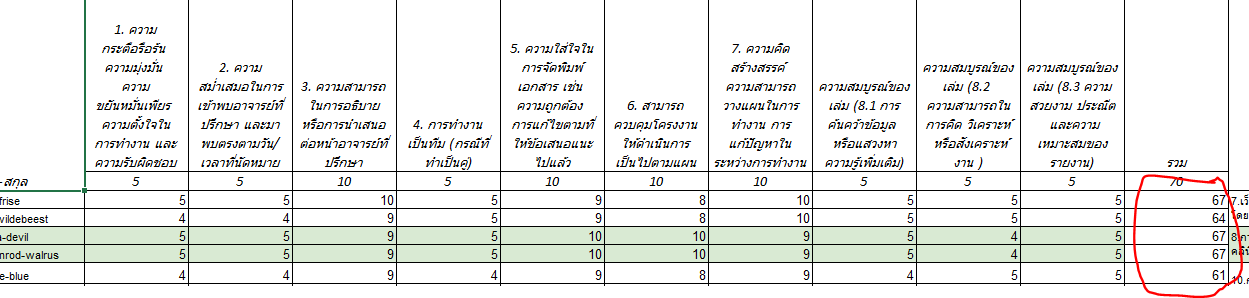

* คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) ***(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)***

   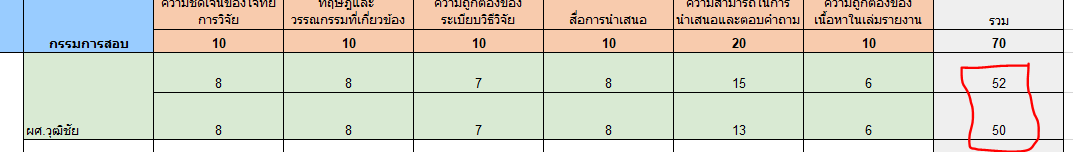

   ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing


2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
***คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)***
3. วาดกราฟ 
* Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า) 
* Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
* Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

***คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)***


# import file

## คะแนนสอบปากเปล่าของกรรมการสอบ

In [144]:
import pandas as pd

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
day1 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [147]:
day1_1 = day1.fillna(method='ffill')
day01 = day1_1.iloc[1:,:]
day01.rename(columns={'นักศึกษา': 'ชื่อ-สกุล'}, inplace=True)
day01.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ห้องสอบ,เวลา,ชื่อเรื่อง,ชื่อ-สกุล,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52


In [148]:
all_aj_list1 = set(list(day01['กรรมการสอบ'].dropna()))
all_aj_list1

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [149]:
day2 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60


In [150]:
day2_1 = day2.fillna(method='ffill')
day02 = day2_1.iloc[1:,:]
day02.rename(columns={'นักศึกษา': 'ชื่อ-สกุล'}, inplace=True)
day02.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ห้องสอบ,เวลา,ชื่อเรื่อง,ชื่อ-สกุล,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
5,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58


In [151]:
all_aj_list2 = set(list(day02['กรรมการสอบ'].dropna()))
all_aj_list2

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [152]:
day3 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57


In [153]:
day3_1 = day3.fillna(method='ffill')
day03 = day3_1.iloc[1:,:]
day03.rename(columns={'นักศึกษา': 'ชื่อ-สกุล'}, inplace=True)
day03.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ห้องสอบ,เวลา,ชื่อเรื่อง,ชื่อ-สกุล,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
5,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59


In [154]:
all_aj_list3 = set(list(day3_1['กรรมการสอบ'].dropna()))
all_aj_list3

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

## คะแนนอาจารย์ที่ปรึกษา

In [155]:
advisor1 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธิปไตย',skiprows=1)
advisor01 = advisor1.iloc[1:,:]
advisor01.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor01.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...


In [156]:
advisor2 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.ธิดาเดียว',skiprows=1)
advisor02 = advisor2.iloc[1:,:]
advisor02.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor02.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,NaN
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,NaN
5,sickly-grey-dugong,5,5,9,5,9,9,9,5,4.5,4.5,65,5.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของนัก...


In [157]:
advisor3 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.สุกัญญา',skiprows=1)
advisor03 = advisor3.iloc[1:,:]
advisor03.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor03.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,NaN
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,NaN
5,clammy-zucchini-chicken,5,5,8,5,9,10,8,5,4,4,63,38.การจัดการสินค้าคงคลังโดยใช้ทฤษฎีสินค้าคงคลั...


In [158]:
advisor4 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor04 = advisor4.iloc[1:,:]
advisor04.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor04.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN
5,randy-gamboge-blue,4,4,9,4,9,8,9,4,5,5,61,10.การพัฒนาชุดข้อมูลและตัวแบบสำหรับฝึกตัวแบบระ...


In [159]:
advisor5 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.วุฒิชัย',skiprows=1)
advisor05 = advisor5.iloc[1:,:]
advisor05.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor05.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,lumpy-carmine-slug,5,5,10,NaN,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,NaN
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...
5,randy-charcoal-flamingo,5,4,9,5.0,9,9,9,5,4,5,64,NaN


In [160]:
advisor6 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.สุพรรณี',skiprows=1)
advisor06 = advisor6.iloc[1:,:]
advisor06.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor06.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,chewy-persimmon-catfish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN
3,greasy-eggplant-oyster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN
5,hazy-beige-stoat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...


In [161]:
advisor7 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ยุภาพร',skiprows=1)
advisor07 = advisor7.iloc[1:,:]
advisor07.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor07.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,NaN
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,NaN
5,snazzy-auburn-lionfish,5,5,10,5,10,10,9,4,4,5,67,40.ตัวแบบพยากรณ์จำนวนผู้ป่วยนอกจำแนกตามแผนก โด...


In [162]:
advisor8 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.พลากร',skiprows=1)
advisor08 = advisor8.iloc[1:,:]
advisor08.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor08.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,NaN
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,NaN
5,stinky-wisteria-nightingale,5,5,10,5,9,8,9,5,5,5,66,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...


In [163]:
advisor9 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.วิชุดา',skiprows=1)
advisor09 = advisor9.iloc[1:,:]
advisor09.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor09.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,NaN
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,NaN
5,geeky-harlequin-duck,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,21.การพัฒนาระบบการเบิกจ่ายพัสดุ สำนักหอสมุด มห...


In [164]:
advisor_10 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.วรรณพร',skiprows=1)
advisor10 = advisor_10.iloc[1:,:]
advisor10.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor10.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.000000,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.000000,NaN
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.000000,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.000000,NaN
5,messy-white-toucan,5,5,7,-,9,9,9,5,4,4,61.384615,20.การเปรียบเทียบประสบการณ์การเรียนแบบออนไลน์ก...


In [165]:
advisor_11 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ธรรณญพร',skiprows=1)
advisor11 = advisor_11.iloc[1:,:]
advisor11.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor11.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,NaN
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,NaN
5,gloppy-fuchsia-akbash,5,5,10,5,9,10,9,5,4,4,66,28.ปัจจัยที่ส่งผลต่อการเลือกสาขาในการศึกษาระดั...


In [166]:
advisor_12 = pd.read_excel('/content/drive/MyDrive/Final/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.อุทุมพร',skiprows=1)
advisor12 = advisor_12.iloc[1:,:]
advisor12.rename(columns={'Unnamed: 0': 'ชื่อ-สกุล'}, inplace=True)
advisor12.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ชื่อ-สกุล,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,NaN
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,NaN
5,scanty-razzmatazz-rabbit,5,5,9,5,9,10,9,4,5,4,65,35.การทำนายการรอดชีวิตของผู้ป่วยโรคหอบหืดโดยอา...


# คิดเปอร์เซ็นต์

## คะแนนสอบปากเปล่าของกรรมการสอบ

In [191]:
per_day01 = day01[['ชื่อ-สกุล','รวม']]
per_day01['รวม']=(per_day01['รวม']*60/70)
per_day01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,44.571429
2,greasy-ruby-bombay,42.857143
3,leaky-rust-chameleon,51.428571
4,greasy-ruby-bombay,49.714286
5,wiggy-silver-drever,44.571429
6,stinky-red-chow,44.571429
7,wiggy-silver-drever,41.142857
8,stinky-red-chow,41.142857
9,paltry-plum-saola,45.428571
10,cloudy-wheat-bobcat,45.428571


In [192]:
per_day02 = day02[['ชื่อ-สกุล','รวม']]
per_day02['รวม']=(per_day02['รวม']*60/70)
per_day02

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,tasty-myrtle-ant,54.000000
2,skanky-burgundy-kingfisher,52.285714
3,tasty-myrtle-ant,51.428571
4,skanky-burgundy-kingfisher,51.428571
5,sleazy-mauve-akita,49.714286
6,crappy-burgundy-quoll,50.571429
7,sleazy-mauve-akita,50.571429
8,crappy-burgundy-quoll,50.571429
9,skinny-bronze-dormouse,52.285714
10,freaky-lemon-peccary,52.285714


In [193]:
per_day03 = day03[['ชื่อ-สกุล','รวม']]
per_day03['รวม']=(per_day03['รวม']*60/70)
per_day03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,frumpy-gamboge-emu,43.714286
2,frumpy-gamboge-emu,38.571429
3,ugly-harlequin-octopus,48.857143
4,craggy-cream-paradise,48.857143
5,ugly-harlequin-octopus,50.571429
6,craggy-cream-paradise,50.571429
7,pokey-asparagus-frise,53.142857
8,randy-charcoal-flamingo,52.285714
9,pokey-asparagus-frise,53.142857
10,randy-charcoal-flamingo,54.857143


## คะแนนอาจารย์ที่ปรึกษา

In [194]:
per_ad01 = advisor01[['ชื่อ-สกุล','รวม']]
per_ad01['รวม']=(per_ad01['รวม']*40/70)
per_ad01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571


In [195]:
per_ad02 = advisor02[['ชื่อ-สกุล','รวม']]
per_ad02['รวม']=(per_ad02['รวม']*40/70)
per_ad02

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286
3,gloppy-persimmon-flamingo,37.142857
4,sleepy-gamboge-zebra,37.142857
5,sickly-grey-dugong,37.142857
6,slaphappy-silver-monkey,37.142857


In [196]:
per_ad03 = advisor03[['ชื่อ-สกุล','รวม']]
per_ad03['รวม']=(per_ad03['รวม']*40/70)
per_ad03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,whiny-pear-otter,36.000000
2,craggy-cream-reindeer,36.000000
3,cloudy-myrtle-kudu,37.714286
4,lovely-asparagus-urchin,37.714286
5,clammy-zucchini-chicken,36.000000
6,greasy-tangerine-moorhen,36.000000


In [197]:
per_ad04 = advisor04[['ชื่อ-สกุล','รวม']]
per_ad04['รวม']=(per_ad04['รวม']*40/70)
per_ad04

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,jumpy-apricot-frise,38.285714
2,boozy-thistle-wildebeest,36.571429
3,hasty-magnolia-devil,38.285714
4,chummy-goldenrod-walrus,38.285714
5,randy-gamboge-blue,34.857143
6,flimsy-lemon-budgerigar,36.571429
7,skimpy-magenta-bombay,40.000000


In [198]:
per_ad05 = advisor05[['ชื่อ-สกุล','รวม']]
per_ad05['รวม']=(per_ad05['รวม']*40/70)
per_ad05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,lumpy-carmine-slug,40.000000
2,snappy-azure-balinese,37.142857
3,pasty-bronze-booby,37.142857
4,pokey-asparagus-frise,36.571429
5,randy-charcoal-flamingo,36.571429


In [199]:
per_ad06 = advisor06[['ชื่อ-สกุล','รวม']]
per_ad06['รวม']=(per_ad06['รวม']*40/70)
per_ad06

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,chewy-persimmon-catfish,35.428571
2,skanky-amaranth-ostrich,31.428571
3,greasy-eggplant-oyster,28.571429
4,randy-mauve-ibis,36.000000
5,hazy-beige-stoat,28.571429
6,squirrely-seashell-kingfisher,28.571429
7,surly-linen-hyena,28.571429
8,nippy-lilac-chin,35.428571


In [200]:
per_ad07 = advisor07[['ชื่อ-สกุล','รวม']]
per_ad07['รวม']=(per_ad07['รวม']*40/70)
per_ad07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,nerdy-plum-abyssinian,38.285714
2,gloppy-xanthic-retriever,38.285714
3,cloudy-myrtle-whippet,38.285714
4,cloudy-grey-walrus,38.285714
5,snazzy-auburn-lionfish,38.285714
6,whiny-peach-audemer,38.285714


In [201]:
per_ad08 = advisor08[['ชื่อ-สกุล','รวม']]
per_ad08['รวม']=(per_ad08['รวม']*40/70)
per_ad08

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,craggy-mustard-sponge,31.428571
2,fuzzy-silver-discus,31.428571
3,lousy-corn-mule,36.571429
4,muggy-charcoal-akita,36.571429
5,stinky-wisteria-nightingale,37.714286
6,hazy-aqua-peccary,37.142857


In [202]:
per_ad09 = advisor09[['ชื่อ-สกุล','รวม']]
per_ad09['รวม']=(per_ad09['รวม']*40/70)
per_ad09

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,tasty-myrtle-ant,34.857143
2,skanky-burgundy-kingfisher,34.857143
3,sleazy-mauve-akita,34.857143
4,crappy-burgundy-quoll,35.428571
5,geeky-harlequin-duck,35.428571
6,gummy-olivine-ibis,34.857143
7,frumpy-gamboge-emu,25.846154
8,ugly-harlequin-octopus,32.857143
9,craggy-cream-paradise,32.571429


In [203]:
per_ad10 = advisor10[['ชื่อ-สกุล','รวม']]
per_ad10['รวม']=(per_ad10['รวม']*40/70)
per_ad10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,skinny-bronze-dormouse,36.571429
2,freaky-lemon-peccary,35.428571
3,flabby-green-fish,37.714286
4,skinny-heliotrope-kudu,38.857143
5,messy-white-toucan,35.076923


In [204]:
per_ad11 = advisor11[['ชื่อ-สกุล','รวม']]
per_ad11['รวม']=(per_ad11['รวม']*40/70)
per_ad11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,chewy-lilac-shark,34.857143
2,greasy-olivine-neanderthal,34.285714
3,hasty-dandelion-grasshopper,35.428571
4,ugly-myrtle-walrus,35.428571
5,gloppy-fuchsia-akbash,37.714286
6,cozy-teal-whale,37.714286
7,flabby-asparagus-heron,29.714286
8,skanky-copper-affenpinscher,31.428571


In [205]:
per_ad12 = advisor12[['ชื่อ-สกุล','รวม']]
per_ad12['รวม']=(per_ad12['รวม']*40/70)
per_ad12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ชื่อ-สกุล,รวม
1,chummy-azure-walrus,38.857143
2,breezy-pear-macaw,39.428571
3,cozy-tangerine-ladybird,35.428571
4,scaly-pumpkin-monkey,35.428571
5,scanty-razzmatazz-rabbit,37.142857
6,grumpy-flax-bonobo,37.142857


# รวมตาราง

## รวมตารางคะแนนสอบปากเปล่าของกรรมการสอบ

In [234]:
tableday = pd.concat([per_day01,per_day02])
tableday

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,44.571429
2,greasy-ruby-bombay,42.857143
3,leaky-rust-chameleon,51.428571
4,greasy-ruby-bombay,49.714286
5,wiggy-silver-drever,44.571429
...,...,...
48,ugly-myrtle-walrus,44.571429
49,gloppy-fuchsia-akbash,50.571429
50,cozy-teal-whale,50.571429
51,gloppy-fuchsia-akbash,53.142857


In [235]:
tableday2 = pd.concat([tableday,per_day03])
tableday2.rename(columns={'รวม': 'คะแนนสอบปากเปล่า'}, inplace=True)
tableday2

,ชื่อ-สกุล,คะแนนสอบปากเปล่า
1,leaky-rust-chameleon,44.571429
2,greasy-ruby-bombay,42.857143
3,leaky-rust-chameleon,51.428571
4,greasy-ruby-bombay,49.714286
5,wiggy-silver-drever,44.571429
...,...,...
50,muggy-charcoal-akita,44.571429
51,stinky-wisteria-nightingale,48.857143
52,hazy-aqua-peccary,48.857143
53,stinky-wisteria-nightingale,50.571429


In [236]:
allday = tableday2.groupby(['ชื่อ-สกุล'])['คะแนนสอบปากเปล่า'].mean()
allday

ชื่อ-สกุล
boozy-thistle-wildebeest    49.285714
breezy-pear-macaw           48.000000
bumpy-indigo-dolphin        45.857143
chewy-lilac-shark           47.571429
chewy-persimmon-catfish     40.714286
                              ...    
ugly-harlequin-octopus      49.714286
ugly-myrtle-walrus          40.714286
whiny-peach-audemer         41.571429
whiny-pear-otter            49.714286
wiggy-silver-drever         42.857143
Name: คะแนนสอบปากเปล่า, Length: 80, dtype: float64

In [253]:
alldayPD = pd.DataFrame(allday)
alldayPD

,คะแนนสอบปากเปล่า
ชื่อ-สกุล,
boozy-thistle-wildebeest,49.285714
breezy-pear-macaw,48.000000
bumpy-indigo-dolphin,45.857143
chewy-lilac-shark,47.571429
chewy-persimmon-catfish,40.714286
...,...
ugly-harlequin-octopus,49.714286
ugly-myrtle-walrus,40.714286
whiny-peach-audemer,41.571429


## รวมตารางคะแนนอาจารย์ที่ปรึกษา

In [238]:
tablead = pd.concat([per_ad01,per_ad02])
tablead

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [239]:
tablead2 = pd.concat([tablead,per_ad03])
tablead2

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [240]:
tablead3 = pd.concat([tablead2,per_ad04])
tablead3

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [241]:
tablead4 = pd.concat([tablead3,per_ad05])
tablead4

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [242]:
tablead5 = pd.concat([tablead4,per_ad06])
tablead5

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [243]:
tablead6 = pd.concat([tablead5,per_ad07])
tablead6

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [244]:
tablead7 = pd.concat([tablead6,per_ad08])
tablead7

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
6,randy-rust-lionfish,34.285714
7,flaky-sepia-setter,39.428571
8,pasty-tomato-okapi,39.428571
1,paltry-plum-saola,37.714286
2,cloudy-wheat-bobcat,37.714286


In [245]:
tablead8 = pd.concat([tablead7,per_ad09])
tablead8

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
...,...,...
5,geeky-harlequin-duck,35.428571
6,gummy-olivine-ibis,34.857143
7,frumpy-gamboge-emu,25.846154
8,ugly-harlequin-octopus,32.857143


In [246]:
tablead9 = pd.concat([tablead8,per_ad10])
tablead9

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
...,...,...
1,skinny-bronze-dormouse,36.571429
2,freaky-lemon-peccary,35.428571
3,flabby-green-fish,37.714286
4,skinny-heliotrope-kudu,38.857143


In [247]:
tablead10 = pd.concat([tablead9,per_ad11])
tablead10

,ชื่อ-สกุล,รวม
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
...,...,...
4,ugly-myrtle-walrus,35.428571
5,gloppy-fuchsia-akbash,37.714286
6,cozy-teal-whale,37.714286
7,flabby-asparagus-heron,29.714286


In [248]:
tablead11 = pd.concat([tablead10,per_ad12])
tablead11.rename(columns={'รวม': 'คะแนนอาจารย์ที่ปรึกษา'}, inplace=True)
tablead11

,ชื่อ-สกุล,คะแนนอาจารย์ที่ปรึกษา
1,leaky-rust-chameleon,38.857143
2,greasy-ruby-bombay,34.857143
3,wiggy-silver-drever,38.285714
4,stinky-red-chow,38.285714
5,bumpy-indigo-dolphin,38.285714
...,...,...
2,breezy-pear-macaw,39.428571
3,cozy-tangerine-ladybird,35.428571
4,scaly-pumpkin-monkey,35.428571
5,scanty-razzmatazz-rabbit,37.142857


## รวมตาราง alldayPD กับตาราง tablead11

In [257]:
mydata = alldayPD.merge(tablead11, left_on='ชื่อ-สกุล', right_on='ชื่อ-สกุล')
mydata

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา
0,boozy-thistle-wildebeest,49.285714,36.571429
1,breezy-pear-macaw,48.000000,39.428571
2,bumpy-indigo-dolphin,45.857143,38.285714
3,chewy-lilac-shark,47.571429,34.857143
4,chewy-persimmon-catfish,40.714286,35.428571
...,...,...,...
75,ugly-harlequin-octopus,49.714286,32.857143
76,ugly-myrtle-walrus,40.714286,35.428571
77,whiny-peach-audemer,41.571429,38.285714
78,whiny-pear-otter,49.714286,36.000000


In [261]:
# รวมคะแนนคะแนนสอบปากเปล่ากับคะแนนอาจารย์ที่ปรึกษา
mydata['คะแนนรวม'] = (mydata['คะแนนสอบปากเปล่า']+mydata['คะแนนอาจารย์ที่ปรึกษา'])
mydata

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
0,boozy-thistle-wildebeest,49.285714,36.571429,85.857143
1,breezy-pear-macaw,48.000000,39.428571,87.428571
2,bumpy-indigo-dolphin,45.857143,38.285714,84.142857
3,chewy-lilac-shark,47.571429,34.857143,82.428571
4,chewy-persimmon-catfish,40.714286,35.428571,76.142857
...,...,...,...,...
75,ugly-harlequin-octopus,49.714286,32.857143,82.571429
76,ugly-myrtle-walrus,40.714286,35.428571,76.142857
77,whiny-peach-audemer,41.571429,38.285714,79.857143
78,whiny-pear-otter,49.714286,36.000000,85.714286


# ตัดเกรด

In [291]:
A = mydata[(mydata['คะแนนรวม']>=80)]
A

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
0,boozy-thistle-wildebeest,49.285714,36.571429,85.857143
1,breezy-pear-macaw,48.000000,39.428571,87.428571
2,bumpy-indigo-dolphin,45.857143,38.285714,84.142857
3,chewy-lilac-shark,47.571429,34.857143,82.428571
5,chummy-azure-walrus,47.571429,38.857143,86.428571
...,...,...,...,...
72,stinky-wisteria-nightingale,49.714286,37.714286,87.428571
74,tasty-myrtle-ant,52.714286,34.857143,87.571429
75,ugly-harlequin-octopus,49.714286,32.857143,82.571429
78,whiny-pear-otter,49.714286,36.000000,85.714286


In [292]:
Bplus = mydata[(mydata['คะแนนรวม']< 80)]
Bplus

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
4,chewy-persimmon-catfish,40.714286,35.428571,76.142857
16,craggy-mustard-sponge,45.428571,31.428571,76.857143
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
23,frumpy-gamboge-emu,41.142857,25.846154,66.989011
24,fuzzy-silver-discus,45.428571,31.428571,76.857143
29,greasy-eggplant-oyster,37.285714,28.571429,65.857143
35,hasty-dandelion-grasshopper,40.714286,35.428571,76.142857
38,hazy-beige-stoat,36.857143,28.571429,65.428571
44,messy-white-toucan,40.285714,35.076923,75.362637
47,nippy-lilac-chin,41.142857,35.428571,76.571429


In [293]:
B = mydata[(mydata['คะแนนรวม']< 75)]
B

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
23,frumpy-gamboge-emu,41.142857,25.846154,66.989011
29,greasy-eggplant-oyster,37.285714,28.571429,65.857143
38,hazy-beige-stoat,36.857143,28.571429,65.428571
59,skanky-amaranth-ostrich,40.714286,31.428571,72.142857
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571
70,squirrely-seashell-kingfisher,36.428571,28.571429,65.000000
73,surly-linen-hyena,41.142857,28.571429,69.714286


In [294]:
Cplus = mydata[(mydata['คะแนนรวม']< 70)]
Cplus

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
23,frumpy-gamboge-emu,41.142857,25.846154,66.989011
29,greasy-eggplant-oyster,37.285714,28.571429,65.857143
38,hazy-beige-stoat,36.857143,28.571429,65.428571
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571
70,squirrely-seashell-kingfisher,36.428571,28.571429,65.000000
73,surly-linen-hyena,41.142857,28.571429,69.714286


In [295]:
C = mydata[(mydata['คะแนนรวม']< 65)]
C

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571


In [296]:
Dplus = mydata[(mydata['คะแนนรวม']< 60)]
Dplus

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571


In [298]:
D = mydata[(mydata['คะแนนรวม']< 55)]
D

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571


In [299]:
F = mydata[(mydata['คะแนนรวม']< 50)]
F

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
18,flabby-asparagus-heron,17.571429,29.714286,47.285714
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571


# วาดกราฟ

## Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

In [334]:
from matplotlib import pyplot as plt
import numpy as np

In [335]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]

In [336]:
mydata_sort = mydata.sort_values('คะแนนรวม',ascending=False)
mydata_sort

,ชื่อ-สกุล,คะแนนสอบปากเปล่า,คะแนนอาจารย์ที่ปรึกษา,คะแนนรวม
64,skinny-heliotrope-kudu,53.571429,38.857143,92.428571
62,skimpy-magenta-bombay,51.857143,40.000000,91.857143
43,lumpy-carmine-slug,51.428571,40.000000,91.428571
52,randy-charcoal-flamingo,53.571429,36.571429,90.142857
19,flabby-green-fish,52.285714,37.714286,90.000000
...,...,...,...,...
29,greasy-eggplant-oyster,37.285714,28.571429,65.857143
38,hazy-beige-stoat,36.857143,28.571429,65.428571
70,squirrely-seashell-kingfisher,36.428571,28.571429,65.000000
61,skanky-copper-affenpinscher,18.000000,31.428571,49.428571


In [337]:
x = mydata_sort['ชื่อ-สกุล']
y1 = mydata_sort['คะแนนสอบปากเปล่า']
y2 = mydata_sort['คะแนนอาจารย์ที่ปรึกษา']

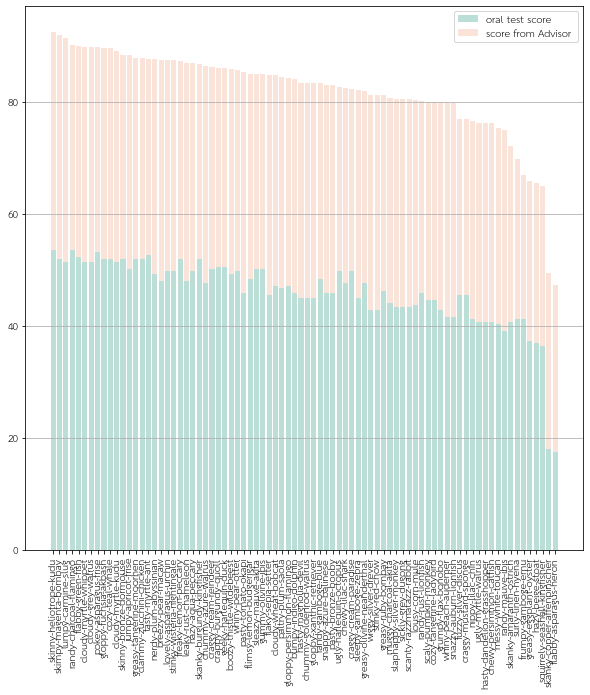

In [338]:
plt.bar(x,y1,label='oral test score',color='#bbded6')
plt.bar(x,y2,bottom=y1,label='score from Advisor ',color='#fae3d9')
plt.xticks(mydata_sort.reset_index()['ชื่อ-สกุล'],rotation=90)
plt.grid(True,axis='y')
plt.legend();

## Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

## Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา